# Laboratory 2


## Preliminaries
### Configuration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
from matplotlib.widgets import Button
import json as js

class _Button_callback(object):
    def __init__(self, scenes):
        self.i = 0
        self.scenes = scenes

    def set_axis(self, ax):
        self.ax = ax
        
    def next(self, event):
        self.i = (self.i + 1) % len(self.scenes)
        self.draw()

    def prev(self, event):
        self.i = (self.i - 1) % len(self.scenes)
        self.draw()
        
    def draw(self):
        self.ax.clear()
        for collection in self.scenes[self.i].points:
            if len(collection.points) > 0:
                self.ax.scatter(*zip(*(np.array(collection.points))), c=collection.color, marker=collection.marker)
        for collection in self.scenes[self.i].lines:
            self.ax.add_collection(collection.get_collection())
        self.ax.autoscale()
        plt.draw()

### Interface

[Available colors](https://matplotlib.org/3.1.1/gallery/color/named_colors.html)

[Available bullet points](https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers)

In [2]:
class Scene:
    def __init__(self, points=[], lines=[]):
        self.points=points
        self.lines=lines

class PointsCollection:
    def __init__(self, points = [], color = None, marker = None):
        self.points = np.array(points)
        self.color = color
        self.marker = marker

class LinesCollection:
    def __init__(self, lines = [], color = None):
        self.color = color
        self.lines = lines
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        if self.color:
            return mcoll.LineCollection(self.lines, colors=mcolors.to_rgba(self.color))
        else:
            return mcoll.LineCollection(self.lines)
            


class Plot:
    def __init__(self, scenes = [], json = None):
        if json is None:
            self.scenes = scenes
        else:
            self.scenes = [Scene([PointsCollection(pointsCol) for pointsCol in scene["points"]], 
                                 [LinesCollection(linesCol) for linesCol in scene["lines"]]) 
                           for scene in js.loads(json)]
        
    def __configure_buttons(self, callback):
        plt.subplots_adjust(bottom=0.2)
        axprev = plt.axes([0.6, 0.05, 0.15, 0.075])
        axnext = plt.axes([0.76, 0.05, 0.15, 0.075])
        bnext = Button(axnext, 'Następny')
        bnext.on_clicked(callback.next)
        bprev = Button(axprev, 'Poprzedni')
        bprev.on_clicked(callback.prev)
        return [bprev, bnext]

    def draw(self):
        plt.close()
        callback = _Button_callback(self.scenes)
        self.widgets = self.__configure_buttons(callback)
        callback.set_axis(plt.axes())
        plt.show()
        callback.draw()
        
    def toJSON(self):
        return js.dumps([{"points": [pointCol.points.tolist() for pointCol in scene.points], 
                          "lines":[linesCol.lines for linesCol in scene.lines]} 
                         for scene in self.scenes])
    

### Example

<IPython.core.display.Javascript object>


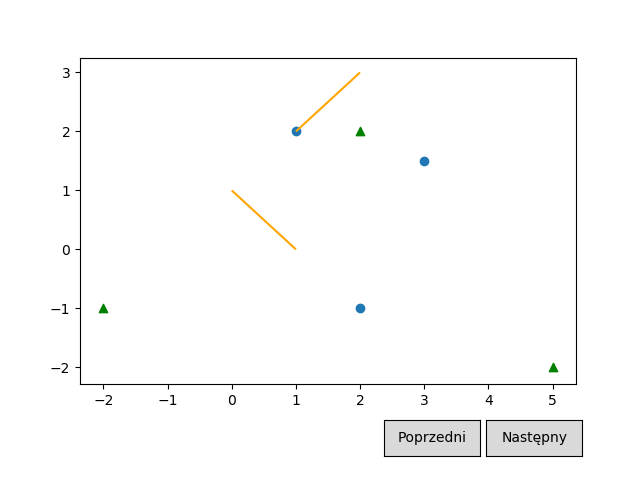

In [3]:
%matplotlib notebook

scenes=[Scene([PointsCollection([(1, 2), (3, 1.5), (2, -1)]), 
               PointsCollection([(5, -2), (2, 2), (-2, -1)], 'green', marker = "^")], 
              [LinesCollection([[(1,2),(2,3)], [(0,1),(1,0)]], 'orange')]), 
        Scene([PointsCollection([(1, 2), (-15, 1.5), (2, -1)], 'red'), 
               PointsCollection([(5, -2), (2, 2), (-2, 1)], 'black')], 
              [LinesCollection([[(-1,2),(-2,3)], [(0,-1),(-1,0)]])])]

plot = Plot(scenes)
plot.draw() 


## Points generation

In [4]:
from random import randint
def gen_points(n = 100, r = 100):
    return [(randint(-r,r), randint(-r, r)) for _ in range(n)]

<IPython.core.display.Javascript object>


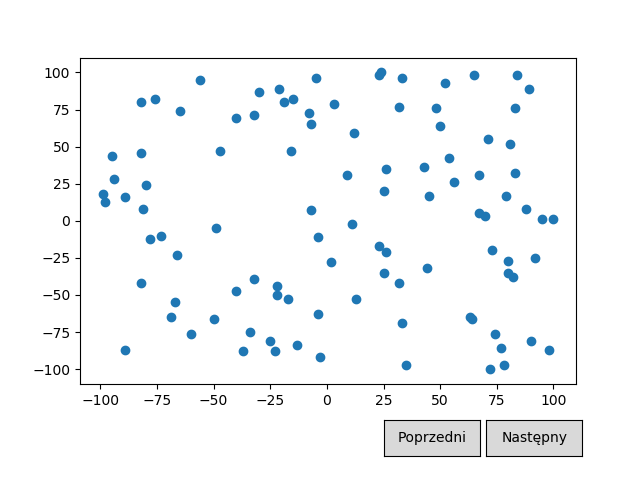

In [5]:
%matplotlib notebook
points = gen_points()

scenes=[Scene([PointsCollection(points)])]
plot = Plot(scenes).draw()


In [6]:
import random, math
def gen_circle(n = 100, r=10, s=(0,0)):
    c = []
    for _ in range(n):
        t = random.random() * (2*math.pi)
        c.append((r*math.sin(t)+s[0], r*math.cos(t)+s[1]))
    return c

<IPython.core.display.Javascript object>


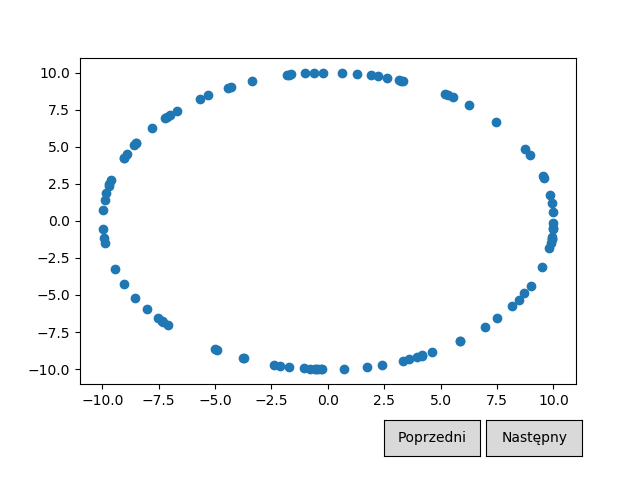

In [7]:
%matplotlib notebook
circle = gen_circle()

scenes=[Scene([PointsCollection(circle)])]
plot = Plot(scenes).draw()


In [8]:
import random
def gen_rectangle(n=100, a=(-10, -10), b=(10, -10), c=(10, 10), d=(-10, 10)):
    v1 = (a[0]-b[0], a[1]-b[1])
    v2 = (b[0]-c[0], b[1]-c[1])
    r = []
    while n:
        n-=1
        s = random.randint(1,4)
        m = random.random()
        if s == 1:
            r.append((b[0]+v1[0]*m, b[1]+v1[1]*m))
        elif s==2:
            r.append((c[0]+v1[0]*m, c[1]+v1[1]*m))
        elif s==3:
            r.append((c[0]+v2[0]*m, c[1]+v2[1]*m))
        else:
            r.append((d[0]+v2[0]*m, d[1]+v2[1]*m))
    return r

<IPython.core.display.Javascript object>


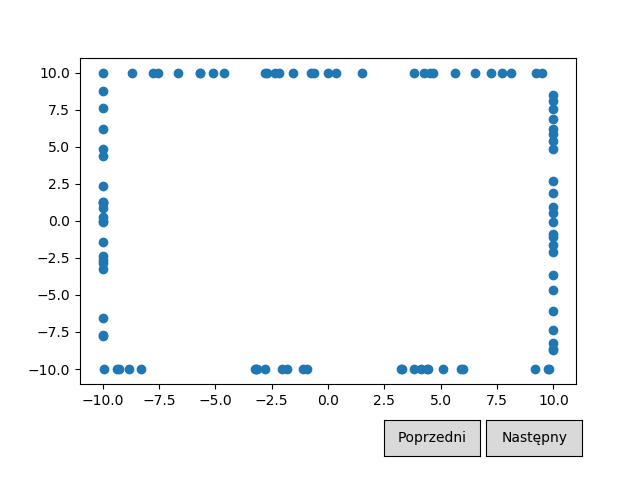

In [9]:
%matplotlib notebook
rectangle = gen_rectangle()

scenes=[Scene([PointsCollection(rectangle)])]
plot = Plot(scenes).draw()


In [10]:
import random
def gen_square(n1=25, n2=20, a=(0, 0), b=(10, 0), c=(10, 10), d=(0, 10)):
    v1 = (a[0]-b[0], a[1]-b[1])
    v2 = (b[0]-c[0], b[1]-c[1])
    r = [a,b,c,d]
    while n1>0:
        n1-=1
        s = random.randint(1,4)
        m = random.random()
        if s == 1:
            r.append((b[0]+v1[0]*m, b[1]+v1[1]*m))
        elif s==2:
            r.append((c[0]+v1[0]*m, c[1]+v1[1]*m))
        elif s==3:
            r.append((c[0]+v2[0]*m, c[1]+v2[1]*m))
        else:
            r.append((d[0]+v2[0]*m, d[1]+v2[1]*m))
    maks = max(a[0],a[1],b[0],b[1],c[0],c[1],d[0],d[1])
    while n2>0:
        n2-=1
        t = random.random()*maks
        s = random.randint(0,1)
        if s:
            r.append((t,t))
        else:
            r.append((t,maks-t))        
    return r

<IPython.core.display.Javascript object>


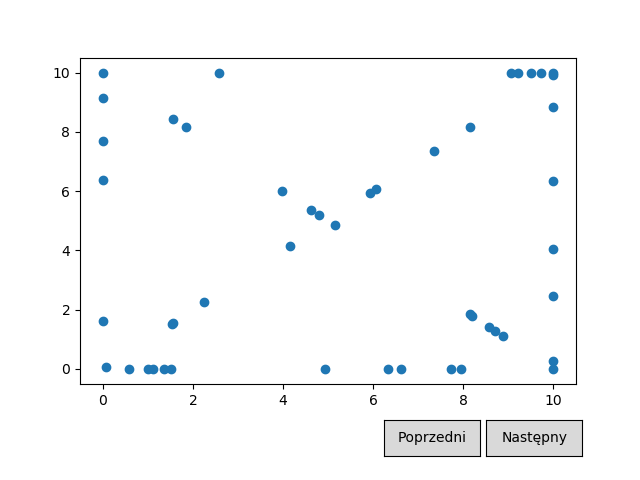

In [11]:
%matplotlib notebook
square = gen_square()
square = sorted(square)[1:]

scenes=[Scene([PointsCollection(square)])]
plot = Plot(scenes).draw()

Available points sets:
* points
* circle
* rectangle
* square

## Convex hull

### Angle sorting

In [12]:
class Point:
    def det(a,b,c):
        return a.x*b.y+a.y*c.x+b.x*c.y-c.x*b.y-a.y*b.x-a.x*c.y
    
    def dist(a,b):
        return (a.x-b.x)**2 + (a.y-b.y)**2
    
    def __init__(self,a):
        self.x = a[0]
        self.y = a[1]
    
    def set_class(low, e = 10**-14):
        Point.low = Point(low)
        Point.e = e
    
    def __gt__(self, other):
        d = Point.det(Point.low, self, other)
        if d < -Point.e:
            return True
        if d > Point.e:
            return False
        return Point.dist(Point.low, self) > Point.dist(Point.low, other)     
    def follows(self, other):
        d = Point.det(Point.low, self, other)
        if d < -Point.e:
            return True
        if d > Point.e:
            return False
        return Point.dist(Point.low, self) < Point.dist(Point.low, other)
        
def to_Points_list(a):
    r = []
    for i in a:
        r.append(Point(i))
    return r

def to_tuples_list(p):
    r = []
    for i in p:
        r.append((i.x,i.y))
    return r

In [13]:
def angle_sort(points, e=10**-14):
    q = min(points, key = lambda x: (x[1],x[0]))
    points.remove(q)
    Point.set_class(q,e)
    
    res = to_tuples_list(sorted(to_Points_list(points)))
    
    points.append(q)
    return [q]+res

### Visualise sorting results

<IPython.core.display.Javascript object>


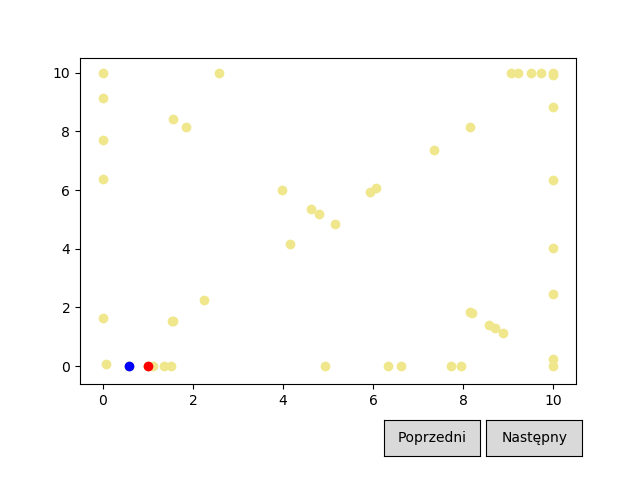

In [14]:
%matplotlib notebook

points_set = square

p = angle_sort(points_set)
scenes=[Scene([PointsCollection(p, 'khaki'),PointsCollection([i], 'red'), PointsCollection([p[0]], 'blue')]) for i in p[1:]]
plot = Plot(scenes)
plot.draw() 



### Scan visualiser

In [15]:
class Scan_visualiser:
    def make_LinesCollection(points):
        res = []
        for i in range(1,len(points)):
            res.append([points[i-1], points[i]])
        return res
    
    def __init__(self):
        self.scenes = []
    def put_scene(self, s):
        self.scenes.append(s)
    def get_scenes(self):
        return self.scenes
    
    def put_scene_scan(self, p, l):
        self.put_scene(Scene( [ PointsCollection(p,'khaki'),PointsCollection(l, 'blue')], 
                              [ LinesCollection(Scan_visualiser.make_LinesCollection(l),'blue')])) 

### Graham Scan

In [16]:
def graham_scan(points_set, visualiser, e=10**-5):
    if len(points_set) <= 2:
        return points_set
    
    points_set = angle_sort(points_set)
    visualiser.put_scene(Scene([PointsCollection(points_set,'khaki')]))
    result = [points_set[0], points_set[1],points_set[2]]
    visualiser.put_scene_scan(points_set, result)

    i = 3
    while i < len(points_set):
        while len(result)>=2 and Point.det(Point(result[-2]), Point(result[-1]), Point(points_set[i]))<e:
            result.pop()
            visualiser.put_scene_scan(points_set, result)
        result.append(points_set[i])
        visualiser.put_scene_scan(points_set, result)
        i+=1
        
    visualiser.put_scene_scan(points_set, result+[result[0]])
    return result

<IPython.core.display.Javascript object>


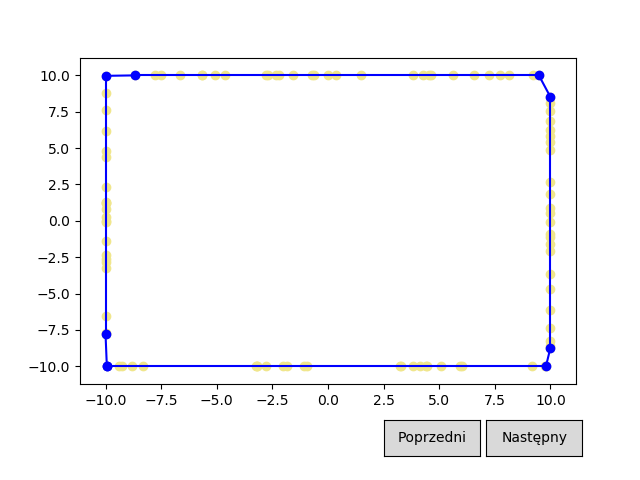

In [21]:
%matplotlib notebook

visualiser = Scan_visualiser()
graham_scan(rectangle, visualiser)

plot = Plot(visualiser.get_scenes())
plot.draw() 


### Gift wrapping algorithm (Jarvis)

In [18]:
def choose_next(points_set, q, e=10**-5):
    if len(points_set) <= 0:
        return
    act = points_set[0]
    Point.set_class(q,e)
    for i in range(1,len(points_set)):
        if Point(act).follows(Point(points_set[i])):
            act = points_set[i]
    return act          

In [19]:
def jarvis_algorithm(p, visualiser, e=10**-5):
    import copy
    points_set = copy.deepcopy(p)
    
    q = min(points_set, key = lambda x: (x[1],x[0]))
    points_set.remove(q)
    
    result = [q]
    visualiser.put_scene_scan(p, result)
    
    d = choose_next(points_set,result[-1])
    while d != result[0] and len(points_set) > 0:
        points_set.remove(d)
        result.append(d)
        
        d = choose_next([q]+points_set,result[-1])
        visualiser.put_scene_scan(p, result)
        
    visualiser.put_scene_scan(p, result+[result[0]])
    return result
    

<IPython.core.display.Javascript object>


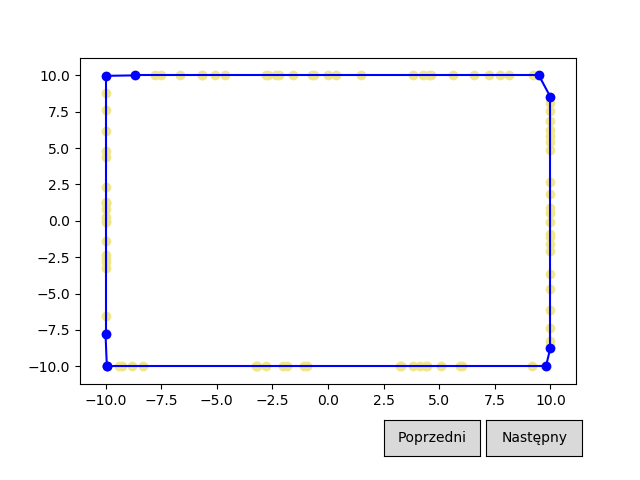

In [20]:
%matplotlib notebook

visualiser = Scan_visualiser()
jarvis_algorithm(rectangle, visualiser)

plot = Plot(visualiser.get_scenes())
plot.draw() 